In [ ]:
Multi-Task Learning Model: A deep neural network architecture with shared hidden layers, which predicts two targets (Life Expectancy and GDP).
Adam Optimizer: Used for compiling and optimizing the model during training.
KFold Cross-Validation: Implemented for cross-validation to evaluate the model's performance across different folds.
Feature Selection: Using Recursive Feature Elimination (RFE) for selecting the most important features.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv(r"C:\Users\super\Downloads\environmental_data_with_near_real_pm25.csv")

In [2]:
print(df.isnull().sum())

Country                                    0
PM2.5 Concentration (µg/m³)               48
CO2 Emissions (metric tons per capita)    31
Air Pollution Index                        0
Water Quality Index                        0
dtype: int64


In [3]:
initial_rows = len(df)
df = df.drop_duplicates()
print(f"Removed {initial_rows - len(df)} duplicate rows.")

Removed 0 duplicate rows.


In [4]:
from sklearn.preprocessing import MinMaxScaler
for column in df.columns:
    if df[column].dtype == float:  
        df[column].fillna(df[column].mean(), inplace=True)


# Normalization of numerical columns using Min-Max Scaler
scaler = MinMaxScaler()
numerical_columns = ['PM2.5 Concentration (µg/m³)', 'CO2 Emissions (metric tons per capita)', 
                     'Air Pollution Index', 'Water Quality Index']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print(df.head())

       Country  PM2.5 Concentration (µg/m³)  \
0  Afghanistan                     1.000000   
1      Albania                     0.054591   
2      Algeria                     0.151421   
3      Andorra                     0.517226   
4       Angola                     0.173116   

   CO2 Emissions (metric tons per capita)  Air Pollution Index  \
0                                0.005792             0.155817   
1                                0.047484             0.819168   
2                                0.116082             0.833467   
3                                0.181059             0.505766   
4                                0.017446             0.000000   

   Water Quality Index  
0             0.273399  
1             0.590675  
2             0.912466  
3             0.206865  
4             0.621461  


In [13]:
data = pd.read_csv("C:\\Users\\super\\Downloads\\cleaned_environmental_data.csv")
world_data = pd.read_csv("C:\\Users\\super\\Downloads\\world-data-2023_cleaned.csv")

In [14]:
columns_to_add = [
    'Country',  
    'Life expectancy',  
    'GDP', 
    'Out of pocket health expenditure',
    'Gross tertiary education enrollment (%)',
    'Population',
    'Urban_population'  
]

In [15]:
if 'Country' not in data.columns:
    data.rename(columns={df.columns[0]: 'Country'}, inplace=True)

if 'Country' in world_data.columns and 'Country' in data.columns:
    merged_data = pd.merge(data, world_data[columns_to_add], on='Country', how='inner')
    print(merged_data.head())
else:
    print("Country column is missing in one of the dataframes or incorrectly named.")

       Country  PM2.5 Concentration (µg/m³)  CO2 Emissions (metric tons per capita)  Air Pollution Index  Water Quality Index  Life expectancy          GDP  Out of pocket health expenditure  Gross tertiary education enrollment (%)  Population  Urban_population
0  Afghanistan                      1.00000                                 0.00579              0.15582              0.27340         64.50000  1.91014e+10                              78.4                                  9.70000  38041754.0         9797273.0
1      Albania                      0.05459                                 0.04748              0.81917              0.59067         78.50000  1.52781e+10                              56.9                                 55.00000   2854191.0         1747593.0
2      Algeria                      0.15142                                 0.11608              0.83347              0.91247         76.70000  1.69988e+11                              28.1                            

In [16]:
if 'Country' not in data.columns:
    data.rename(columns={df.columns[0]: 'Country'}, inplace=True)

if 'Country' in world_data.columns and 'Country' in data.columns:
    merged_data = pd.merge(data, world_data[columns_to_add], on='Country', how='inner')
    print(merged_data.head())
else:
    print("Country column is missing in one of the dataframes or incorrectly named.")

       Country  PM2.5 Concentration (µg/m³)  CO2 Emissions (metric tons per capita)  Air Pollution Index  Water Quality Index  Life expectancy          GDP  Out of pocket health expenditure  Gross tertiary education enrollment (%)  Population  Urban_population
0  Afghanistan                      1.00000                                 0.00579              0.15582              0.27340         64.50000  1.91014e+10                              78.4                                  9.70000  38041754.0         9797273.0
1      Albania                      0.05459                                 0.04748              0.81917              0.59067         78.50000  1.52781e+10                              56.9                                 55.00000   2854191.0         1747593.0
2      Algeria                      0.15142                                 0.11608              0.83347              0.91247         76.70000  1.69988e+11                              28.1                            

In [6]:
import seaborn as sns
numeric_data = merged_data.select_dtypes(include=[np.number])  
correlation_matrix = numeric_data.corr()
life_expectancy_correlation = correlation_matrix['Life expectancy'].sort_values(ascending=False)
print(life_expectancy_correlation)

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Extended Correlation Matrix')
plt.show()

Life expectancy                            1.000000
Gross tertiary education enrollment (%)    0.714553
CO2 Emissions (metric tons per capita)     0.448901
GDP                                        0.175355
Air Pollution Index                        0.094701
Urban_population                           0.070007
Population                                 0.008409
Water Quality Index                        0.005960
Out of pocket health expenditure          -0.317561
PM2.5 Concentration (µg/m³)               -0.384366
Name: Life expectancy, dtype: float64


NameError: name 'plt' is not defined

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import keras_tuner as kt

X = merged_data.drop(['Life expectancy', 'Country'], axis=1)
y_life_expectancy = merged_data['Life expectancy']
y_gdp = merged_data['GDP']

scaler_y_life = MinMaxScaler()
y_train_life_scaled = scaler_y_life.fit_transform(y_life_expectancy.values.reshape(-1, 1))

scaler_y_gdp = MinMaxScaler()
y_train_gdp_scaled = scaler_y_gdp.fit_transform(y_gdp.values.reshape(-1, 1))

X_train_full, X_test, y_train_life, y_test_life = train_test_split(X, y_train_life_scaled, test_size=0.2, random_state=42)
_, _, y_train_gdp, y_test_gdp = train_test_split(X, y_train_gdp_scaled, test_size=0.2, random_state=42)

selector = RFE(LinearRegression(), n_features_to_select=30)
X_train_selected = selector.fit_transform(X_train_full, y_train_life)
X_test_selected = selector.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

def build_model(hp):
    input_layer = Input(shape=(X_train_scaled.shape[1],))

    hp_units_1 = hp.Int('units_1', min_value=64, max_value=256, step=64)
    hp_units_2 = hp.Int('units_2', min_value=64, max_value=128, step=32)
    hp_units_3 = hp.Int('units_3', min_value=32, max_value=64, step=16)
    hp_dropout = hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    shared = Dense(hp_units_1, activation='relu')(input_layer)
    shared = BatchNormalization()(shared)
    shared = Dropout(hp_dropout)(shared)

    shared = Dense(hp_units_2, activation='relu')(shared)
    shared = BatchNormalization()(shared)
    shared = Dropout(hp_dropout)(shared)

    shared = Dense(hp_units_3, activation='relu')(shared)
    shared = BatchNormalization()(shared)
    shared = Dropout(hp_dropout)(shared)

    life_output = Dense(1, name='life_expectancy_output')(shared)
    gdp_output = Dense(1, name='gdp_output')(shared)

    mtl_model = Model(inputs=input_layer, outputs=[life_output, gdp_output])

    mtl_model.compile(optimizer=Adam(learning_rate=hp_learning_rate),  
                      loss={'life_expectancy_output': 'mse', 'gdp_output': 'mse'},
                      loss_weights={'life_expectancy_output': 2.0, 'gdp_output': 0.5})
    
    return mtl_model

tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=200,
    factor=3,
    directory='keras_tuner_dir',
    project_name='mtl_life_expectancy')

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

tuner.search(X_train_scaled, {'life_expectancy_output': y_train_life, 'gdp_output': y_train_gdp}, 
             validation_data=(X_test_scaled, {'life_expectancy_output': y_test_life, 'gdp_output': y_test_gdp}),
             epochs=200, batch_size=32, callbacks=[early_stopping])

best_model = tuner.get_best_models(num_models=1)[0]

history = best_model.fit(X_train_scaled, {'life_expectancy_output': y_train_life, 'gdp_output': y_train_gdp}, 
                         validation_data=(X_test_scaled, {'life_expectancy_output': y_test_life, 'gdp_output': y_test_gdp}),
                         epochs=300, batch_size=64, verbose=1, callbacks=[early_stopping])

y_pred_life, y_pred_gdp = best_model.predict(X_test_scaled)

y_pred_life_rescaled = scaler_y_life.inverse_transform(y_pred_life)
y_test_life_rescaled = scaler_y_life.inverse_transform(y_test_life)

rmse_life = np.sqrt(mean_squared_error(y_test_life_rescaled, y_pred_life_rescaled))
r2_life = r2_score(y_test_life_rescaled, y_pred_life_rescaled)
mae_life = mean_absolute_error(y_test_life_rescaled, y_pred_life_rescaled)

print(f"Optimized Multi-Task Learning - Life Expectancy RMSE: {rmse_life}, R2: {r2_life}, MAE: {mae_life}")

C:\Users\super\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=30 > n_features=9. There will be no feature selection and all features will be kept.
  warnings.warn(


Reloading Tuner from keras_tuner_dir\mtl_life_expectancy\tuner0.json
Epoch 1/300


C:\Users\super\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 289ms/step - gdp_output_loss: 0.5799 - life_expectancy_output_loss: 0.1380 - loss: 0.7580 - val_gdp_output_loss: 0.1038 - val_life_expectancy_output_loss: 0.0353 - val_loss: 0.1391
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - gdp_output_loss: 0.1843 - life_expectancy_output_loss: 0.0432 - loss: 0.2262 - val_gdp_output_loss: 0.0446 - val_life_expectancy_output_loss: 0.0034 - val_loss: 0.0480
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - gdp_output_loss: 0.0965 - life_expectancy_output_loss: 0.0214 - loss: 0.1163 - val_gdp_output_loss: 0.1344 - val_life_expectancy_output_loss: 0.0115 - val_loss: 0.1459
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - gdp_output_loss: 0.1138 - life_expectancy_output_loss: 0.0244 - loss: 0.1343 - val_gdp_output_loss: 0.1013 - val_life_expectancy_output_loss: 0.0087 - val_loss: 0.1100
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - gdp_output_loss: 0.1268 - life_expectancy_output_loss: 0.0153 - loss: 0.1469 - 

In [8]:
import pandas as pd

data = [
    {'trial_id': '0144', 'units_1': 256, 'units_2': 64, 'units_3': 48, 'dropout': 0.3, 'learning_rate': 0.01, 'score': 0.01847},
    {'trial_id': '0234', 'units_1': 64, 'units_2': 64, 'units_3': 48, 'dropout': 0.3, 'learning_rate': 0.01, 'score': 0.01878},
    {'trial_id': '0146', 'units_1': 256, 'units_2': 64, 'units_3': 48, 'dropout': 0.3, 'learning_rate': 0.01, 'score': 0.01975},
    {'trial_id': '0145', 'units_1': 128, 'units_2': 64, 'units_3': 32, 'dropout': 0.2, 'learning_rate': 0.01, 'score': 0.01995},
    {'trial_id': '0247', 'units_1': 256, 'units_2': 128, 'units_3': 48, 'dropout': 0.3, 'learning_rate': 0.001, 'score': 0.02048},
    {'trial_id': '0142', 'units_1': 256, 'units_2': 128, 'units_3': 48, 'dropout': 0.4, 'learning_rate': 0.01, 'score': 0.02062},
    {'trial_id': '0231', 'units_1': 64, 'units_2': 64, 'units_3': 48, 'dropout': 0.3, 'learning_rate': 0.01, 'score': 0.02062},
    {'trial_id': '0235', 'units_1': 192, 'units_2': 96, 'units_3': 64, 'dropout': 0.1, 'learning_rate': 0.01, 'score': 0.02073},
    {'trial_id': '0143', 'units_1': 256, 'units_2': 96, 'units_3': 32, 'dropout': 0.3, 'learning_rate': 0.01, 'score': 0.02074},
    {'trial_id': '0147', 'units_1': 128, 'units_2': 64, 'units_3': 32, 'dropout': 0.2, 'learning_rate': 0.01, 'score': 0.02075}
]

df = pd.DataFrame(data)

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 5)

print(df.to_string(index=False))

trial_id  units_1  units_2  units_3  dropout  learning_rate   score
    0144      256       64       48      0.3          0.010 0.01847
    0234       64       64       48      0.3          0.010 0.01878
    0146      256       64       48      0.3          0.010 0.01975
    0145      128       64       32      0.2          0.010 0.01995
    0247      256      128       48      0.3          0.001 0.02048
    0142      256      128       48      0.4          0.010 0.02062
    0231       64       64       48      0.3          0.010 0.02062
    0235      192       96       64      0.1          0.010 0.02073
    0143      256       96       32      0.3          0.010 0.02074
    0147      128       64       32      0.2          0.010 0.02075


In [19]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = []
mae_scores = []
r2_scores = []

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

for train_index, val_index in kf.split(X_train_scaled):
    X_train_k, X_val_k = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_life_k, y_val_life_k = y_train_life[train_index], y_train_life[val_index]
    y_train_gdp_k, y_val_gdp_k = y_train_gdp[train_index], y_train_gdp[val_index]

    hp = kt.HyperParameters()
    hp.Fixed('units_1', value=128)
    hp.Fixed('units_2', value=96)
    hp.Fixed('units_3', value=48)
    hp.Fixed('dropout', value=0.3)
    hp.Fixed('learning_rate', value=1e-3)
    model = build_model(hp)

    model.compile(optimizer=Adam(learning_rate=1e-3), 
                  loss={'life_expectancy_output': 'mse', 'gdp_output': 'mse'},
                  metrics={'life_expectancy_output': ['mse'], 'gdp_output': ['mse']})

    model.fit(X_train_k, {'life_expectancy_output': y_train_life_k, 'gdp_output': y_train_gdp_k}, 
              epochs=100, batch_size=64, verbose=0, 
              callbacks=[early_stopping, lr_scheduler])

    y_pred_k = model.predict(X_val_k)

    y_pred_k_life = y_pred_k[0] 
    y_val_rescaled = scaler_y_life.inverse_transform(y_val_life_k)
    y_pred_k_rescaled = scaler_y_life.inverse_transform(y_pred_k_life)

    rmse_k = np.sqrt(mean_squared_error(y_val_rescaled, y_pred_k_rescaled))
    mae_k = mean_absolute_error(y_val_rescaled, y_pred_k_rescaled)
    r2_k = r2_score(y_val_rescaled, y_pred_k_rescaled)

    rmse_scores.append(rmse_k)
    mae_scores.append(mae_k)
    r2_scores.append(r2_k)

mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
mean_r2 = np.mean(r2_scores)

y_test_pred = mtl_model.predict(X_test_scaled)

y_test_pred_life = y_test_pred[0]

y_test_pred_rescaled = scaler_y_life.inverse_transform(y_test_pred_life)
y_test_rescaled = scaler_y_life.inverse_transform(y_test_life)

meta_model_rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_test_pred_rescaled))

print(f"Mean RMSE across folds: {mean_rmse}")
print(f"Mean MAE across folds: {mean_mae}")
print(f"Mean R2 across folds: {mean_r2}")
print(f"Meta-Model RMSE on test set: {meta_model_rmse}")

C:\Users\super\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: gdp_output_loss,gdp_output_mse,life_expectancy_output_loss,life_expectancy_output_mse,loss
  current = self.get_monitor_value(logs)
C:\Users\super\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\callbacks\callback_list.py:151: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: gdp_output_loss,gdp_output_mse,life_expectancy_output_loss,life_expectancy_output_mse,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


C:\Users\super\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: gdp_output_loss,gdp_output_mse,life_expectancy_output_loss,life_expectancy_output_mse,loss
  current = self.get_monitor_value(logs)
C:\Users\super\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\callbacks\callback_list.py:151: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: gdp_output_loss,gdp_output_mse,life_expectancy_output_loss,life_expectancy_output_mse,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


C:\Users\super\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: gdp_output_loss,gdp_output_mse,life_expectancy_output_loss,life_expectancy_output_mse,loss
  current = self.get_monitor_value(logs)
C:\Users\super\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\callbacks\callback_list.py:151: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: gdp_output_loss,gdp_output_mse,life_expectancy_output_loss,life_expectancy_output_mse,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


C:\Users\super\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: gdp_output_loss,gdp_output_mse,life_expectancy_output_loss,life_expectancy_output_mse,loss
  current = self.get_monitor_value(logs)
C:\Users\super\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\callbacks\callback_list.py:151: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: gdp_output_loss,gdp_output_mse,life_expectancy_output_loss,life_expectancy_output_mse,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


C:\Users\super\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: gdp_output_loss,gdp_output_mse,life_expectancy_output_loss,life_expectancy_output_mse,loss
  current = self.get_monitor_value(logs)
C:\Users\super\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\callbacks\callback_list.py:151: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: gdp_output_loss,gdp_output_mse,life_expectancy_output_loss,life_expectancy_output_mse,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


NameError: name 'mtl_model' is not defined

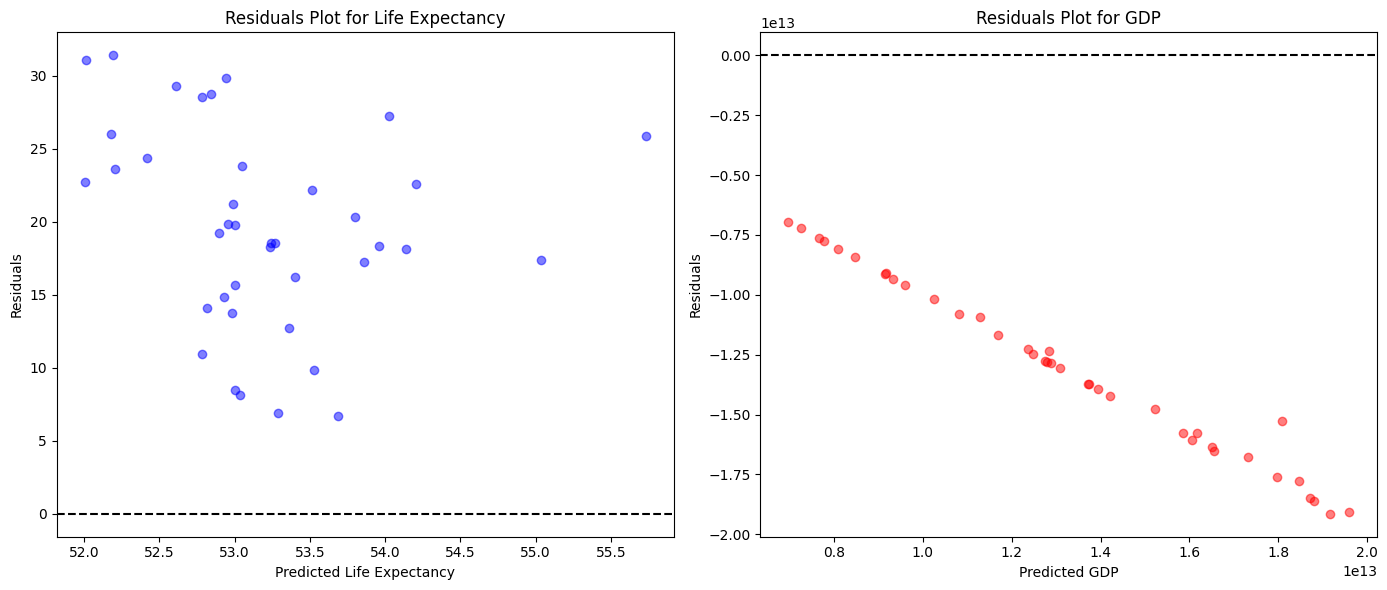

In [21]:
import matplotlib.pyplot as plt

residuals_life = y_test_life_rescaled - y_pred_life_rescaled
residuals_gdp = y_test_gdp_rescaled - y_pred_gdp_rescaled

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred_life_rescaled, residuals_life, color='blue', alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--')
plt.title('Residuals Plot for Life Expectancy')
plt.xlabel('Predicted Life Expectancy')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.scatter(y_pred_gdp_rescaled, residuals_gdp, color='red', alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--')
plt.title('Residuals Plot for GDP')
plt.xlabel('Predicted GDP')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()